## ドライブをマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
!ls 'drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset'

test	     train	   val	       X_test.npy   X_val.npy	y_train.npy
test.tar.gz  train.tar.gz  val.tar.gz  X_train.npy  y_test.npy	y_val.npy


## tarfileを解凍

In [0]:
# import tarfile

# for s in ["train", "val", "test"]:
#   print(s+" start!")
#   with tarfile.open('drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/'+s+'.tar.gz', 'r:*') as tar:
#     tar.extractall('drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset')
#   print(s+" finish!")

## 画像をロード

In [0]:
# import glob
# from tqdm import tqdm
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import time

# time.sleep(1)
# print("\n---------------------------------")
# print("train data loading...")
# time.sleep(1)

# X_train_list = []
# y_train_list = []
# for i in range(2):
#   files =glob.glob("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/train/"+str(i)+"/*")
#   for fname in tqdm(files):
#     img = cv2.imread(fname, 0)
#     X_train_list.append(img)
#     y_train_list.append(i)

# X_train = np.array(X_train_list)
# y_train = np.array(y_train_list)
# print("")
# print("X_train shape: {}".format(X_train.shape))
# print("y_train shape: {}".format(y_train.shape))

# time.sleep(1)
# print("\n---------------------------------")
# print("validation data loading...")
# time.sleep(1)

# X_val_list = []
# y_val_list = []
# for i in range(2):
#   files =glob.glob("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/val/"+str(i)+"/*")
#   for fname in tqdm(files):
#     img = cv2.imread(fname, 0)
#     X_val_list.append(img)
#     y_val_list.append(i)

# X_val = np.array(X_val_list)
# y_val = np.array(y_val_list)
# print("")
# print("X_val shape: {}".format(X_val.shape))
# print("y_val shape: {}".format(y_val.shape))

# time.sleep(1)
# print("\n---------------------------------")
# print("test data loading...")
# time.sleep(1)

# X_test_list = []
# y_test_list = []
# for i in range(2):
#   files =glob.glob("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/test/"+str(i)+"/*")
#   for fname in tqdm(files):
#     img = cv2.imread(fname, 0)
#     X_test_list.append(img)
#     y_test_list.append(i)

# X_test = np.array(X_test_list)
# y_test = np.array(y_test_list)
# print("")
# print("X_test shape: {}".format(X_test.shape))
# print("y_test shape: {}".format(y_test.shape))

## ndaarayをnpyで保存

In [0]:
# np.save("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/X_train", X_train)
# np.save("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/y_train", y_train)
# np.save("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/X_val", X_val)
# np.save("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/y_val", y_val)
# np.save("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/X_test", X_test)
# np.save("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/y_test", y_test)

## ndarray形式の画像データをロード

In [0]:
import numpy as np

X_train = np.load("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/X_train.npy")
y_train = np.load("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/y_train.npy")
X_val = np.load("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/X_val.npy")
y_val = np.load("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/y_val.npy")
X_test = np.load("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/X_test.npy")
y_test = np.load("drive/My Drive/Colab Notebooks/2_MedicalImageClassification/Dataset/y_test.npy")



from keras.utils.np_utils import to_categorical

X_train = X_train[..., None]
X_val = X_val[..., None]
X_test = X_test[..., None]
y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

## 学習履歴表示

In [0]:
import matplotlib.pyplot as plt

def plot_history_loss(hist):
    plt.plot(hist.history['loss'],label="train")
    plt.plot(hist.history['val_loss'],label="val")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()

def plot_history_acc(hist):
    plt.plot(hist.history['accuracy'],label="train")
    plt.plot(hist.history['val_accuracy'],label="val")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0, 1])
    plt.show()

## モデル構築

### AlexNet (https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 56, 56, 96)        11712     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 384)      

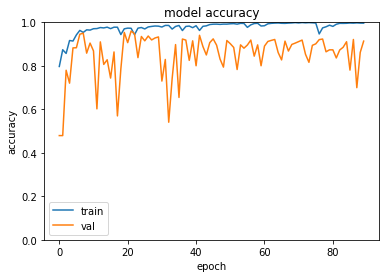

2458/2458 [==============================] - 1s 390us/step
acc= 0.9393815994262695 loss= 0.3498588832052858


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, BatchNormalization, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.initializers import RandomNormal

model = Sequential()

model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding="same", activation="relu", kernel_initializer=RandomNormal(mean=0, stddev=0.01), bias_initializer="zeros" ,input_shape=(224, 224, 1)))
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(5, 5), padding="same", activation="relu", kernel_initializer=RandomNormal(mean=0, stddev=0.01), bias_initializer="ones"))
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3, 3), padding="same", activation="relu", kernel_initializer=RandomNormal(mean=0, stddev=0.01), bias_initializer="zeros"))
model.add(Conv2D(filters=384, kernel_size=(3, 3), padding="same", activation="relu", kernel_initializer=RandomNormal(mean=0, stddev=0.01), bias_initializer="ones"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu", kernel_initializer=RandomNormal(mean=0, stddev=0.01), bias_initializer="ones"))
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=4096, activation="relu", kernel_initializer=RandomNormal(mean=0, stddev=0.01), bias_initializer="zeros"))
model.add(Dropout(0.5))
model.add(Dense(units=4096, activation="relu", kernel_initializer=RandomNormal(mean=0, stddev=0.01), bias_initializer="zeros"))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
model.compile(optimizer=SGD(lr=0.01, momentum=0.9, decay=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
hist = model.fit(X_train, y_train_oh, batch_size=128, epochs=90, validation_data=(X_val, y_val_oh))
plot_history_acc(hist)
score = model.evaluate(X_test, y_test_oh, verbose=1)
print('acc=', score[1], 'loss=', score[0])

## GoogLeNet (https://arxiv.org/pdf/1409.4842.pdf)

### VGG16 (https://arxiv.org/pdf/1409.1556.pdf)